In [1]:
# 주피터 노트북 환경설정
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

from IPython.core.display import display, HTML
# display(HTML("<style>.container { font-weight: bold !important; font-family:'Malgun Gothic' !important;}</style>"))
# display(HTML("<style>.container { font-weight: bold !important;}</style>"))
# display(HTML("<style>.container { width: 98% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

# 관련 라이브러리 임포트 
import matplotlib.font_manager as fm

#  한글글꼴로 변경
# plt.rcParams['font.family'] = '한글글꼴명'
plt.rcParams['font.size'] = 11.0
# plt.rcParams['font.family'] = 'batang'
plt.rcParams['font.family'] = 'Malgun Gothic'

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
matplotlib.rcParams['axes.unicode_minus'] = False

# 그래프 기본 크기 설정 
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.linear_model import Ridge, Lasso

from sklearn.metrics import f1_score, recall_score, precision_score, classification_report

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.pipeline import Pipeline

## 릿지와 라쏘

#### 규제(Rugularization) 
- 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 제어하는 것. 선형 회귀의 경우 계수 즉 기울기의 크기를 작게 만든다.  

#### 릿지(ridge) 회귀 
- 규제가 있는 선형 회귀 모델중 하나이며 선형 모델의 계수를 작게 만들어 과대 적합을 완화시킨다.계수의 제곱 기준 

#### 라쏘(lasso) 회귀 
- 릿지와 같이 규제가 있는 선형 회귀 모델중 하나이며 회귀 계수 값을 0으로 만들수도 있다. 계수의 절대값 기준

## 릿지

In [4]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

#타겟
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

X_train, X_test, y_train, y_test = train_test_split(perch_full, perch_weight, random_state=42)

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)


scale = StandardScaler()
scale.fit(X_train_poly)

X_train_scaled = scale.transform(X_train_poly)
X_test_scaled = scale.transform(X_test_poly)

In [8]:
X_test_scaled.shape, X_train_scaled.shape

((14, 55), (42, 55))

In [6]:
X_test_scaled[:2]

array([[-2.29657672, -2.0645632 , -1.95288184, -1.55255604, -1.46585499,
        -1.45227925, -1.38306012, -1.36853915, -1.3414385 , -1.16487216,
        -1.12766176, -1.12993021, -1.09096504, -1.0919529 , -1.08681842,
        -1.05473034, -1.05422049, -1.04733556, -1.03445922, -0.95097661,
        -0.93581382, -0.94095847, -0.92003743, -0.92481854, -0.9257405 ,
        -0.90344054, -0.9076728 , -0.90768173, -0.90365223, -0.88585964,
        -0.88933355, -0.8882214 , -0.88265495, -0.87279092, -0.82345261,
        -0.81922614, -0.82441462, -0.81401521, -0.81951597, -0.82223805,
        -0.80760074, -0.81327179, -0.81584326, -0.81548696, -0.79980303,
        -0.80545985, -0.80768359, -0.80657966, -0.80223729, -0.79049072,
        -0.7959136 , -0.79756241, -0.7954801 , -0.78971903, -0.78033726],
       [-1.1967077 , -0.98223359, -0.85919166, -1.06961356, -0.99185789,
        -0.95563426, -0.92268296, -0.88613609, -0.84269005, -0.95543049,
        -0.92180981, -0.91161782, -0.8899864 , -0.

In [12]:
# from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

Ridge()

In [11]:
print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9896101671037343
0.9790693977615386


In [13]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

LinearRegression()

In [14]:
print(model_lr.score(X_train_scaled, y_train))
print(model_lr.score(X_test_scaled, y_test))

1.0
-358.8506883451272


In [17]:
#기울기 - ridge
print(model_ridge.coef_)
print()
print(model_ridge.coef_.min(), model_ridge.coef_.max(), model_ridge.coef_.mean())

[18.75202605  9.99048537  9.64586193 17.278557   14.42089598 12.69251285
 12.34283964 10.88252862 12.55963482 12.93825844 12.67925897  9.12136175
 12.49327194  9.02641662  8.39716922 12.21409663  8.99564455  8.85968975
 11.68602892  7.48294042  8.98610839  3.37199818 10.27381252  4.61786228
  1.60700275 11.21975321  5.66171476  2.9808368   3.17359806 11.72544455
  6.40554378  4.19129005  5.06384222  8.89201309  1.89344091  4.81186299
 -2.91832747  7.38733861 -0.51038117 -5.91335297  9.5029666   1.56464851
 -3.66645267 -6.13031213 11.06068777  3.21356622 -1.71089861 -3.65107495
 -2.63704498 11.98418393  4.3636902  -0.11776857 -1.40420516  0.45174316
  5.29453248]

-6.1303121260897 18.75202604944722 6.427257142033631


#### ridge의 규제 정도 -> alpha=1.0 (default)
#### 1.0보다 작으면 약한 규제, 1.0보다 크면 강한 규제

In [18]:
#기울기 - linear
print(model_lr.coef_)
print()
print(model_lr.coef_.min(), model_lr.coef_.max(), model_lr.coef_.mean())

[  -589630.50632573     58882.34307393    292479.5752375
   3614696.52944019   2676387.9665871   -4179338.8183397
   1913385.13425657  -7462398.40355898   4644311.62003781
   1112036.24181948 -36636084.82557356   8265194.95413774
  10957186.12609441  44560029.65213348 -18234640.90463739
 -10575138.85150567   7800352.445491   -11116646.09414671
   1508213.95523817  -2366902.43083687  32780600.39125529
  -7086929.3693608    6162417.06085746 -21442493.57754866
    958974.27238497  -6479999.52099698 -16087564.77922762
 -24612355.68888687  26477276.42394566  10193063.31613975
  -2161671.3520718   -1494714.7276726   18751462.9630843
 -11464734.5492194  -16778724.41607646  21634520.1318395
  17961770.55614863 -15580796.56823963  -3698271.78552324
   1658671.18446409 -22830888.79889741   4544534.31191496
 -20028332.69261038  -7658878.7441799   12298552.58593444
  34365168.22879573  14317535.83776338  -3335164.67255283
   5353004.90967735  -4052599.9099707   -8063366.6820366
 -10439620.55746448

#### alpha 값에 따른 점수 리스트

In [19]:
train_score = []
test_score = []

In [20]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    
    model_ridge = Ridge(alpha=a)
    
    model_ridge.fit(X_train_scaled, y_train)
    
    train_score.append(model_ridge.score(X_train_scaled, y_train))
    test_score.append(model_ridge.score(X_test_scaled, y_test))

In [21]:
alpha_list

[0.001, 0.01, 0.1, 1, 10, 100]

In [22]:
#학습 점수의 경우 alpha값이 낮으면 점수가 높아짐
alpha_list, train_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9930455252088454,
  0.9917809981250512,
  0.9903815817570368,
  0.9896101671037343,
  0.988728468997471,
  0.9841843235774494])

In [23]:
#테스트 점수의 경우 alpha값이 낮으면 점수가 낮아짐
alpha_list, test_score

([0.001, 0.01, 0.1, 1, 10, 100],
 [0.9569388961553603,
  0.9800187936872427,
  0.9827976465386984,
  0.9790693977615386,
  0.9725329582461569,
  0.9627042641050291])

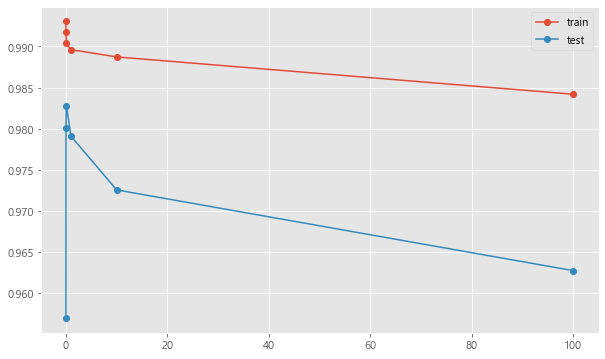

In [27]:
#시각화
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.legend()
plt.show()

#두 선 사이의 거리가 가장 짧은 곳이 최적의 alpha 값

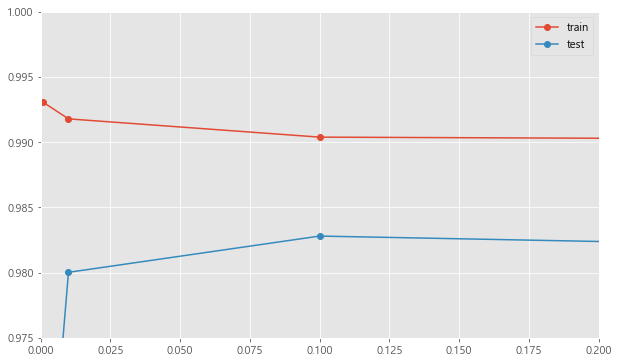

In [28]:
#시각화
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.xlim([0, .2])
plt.ylim([0.975, 1.0])
plt.legend()
plt.show()
#0.1이 최적

#### 그래프의 부분 확대

In [31]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
print(np.log10(alpha_list))
print(10**(np.log10(alpha_list)))

[-3. -2. -1.  0.  1.  2.]
[  0.001   0.01    0.1     1.     10.    100.   ]


In [30]:
#쥬피터노트북의 숫자 옵션 변경
np.set_printoptions(precision=3, suppress=True)
10**(np.log10(alpha_list))

array([  0.001,   0.01 ,   0.1  ,   1.   ,  10.   , 100.   ])

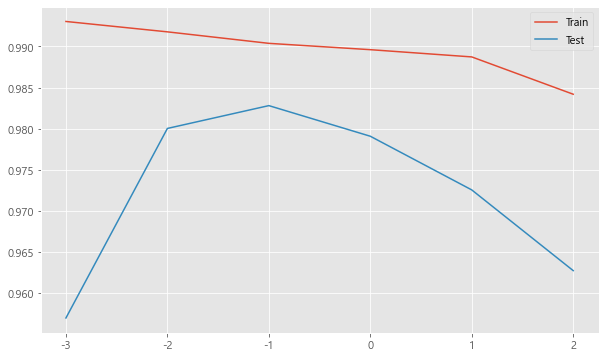

In [32]:
plt.plot(np.log10(alpha_list), train_score, label='Train')
plt.plot(np.log10(alpha_list), test_score, label='Test')
plt.legend()
plt.show()

In [33]:
#alpha 0.1로 다시 학습
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)

print(model_ridge.score(X_train_scaled, y_train))
print(model_ridge.score(X_test_scaled, y_test))

0.9903815817570368
0.9827976465386984


In [34]:
model_ridge.coef_

array([ 27.619,  -1.64 , -19.733,  30.031,  16.998,  17.832,   4.469,
         3.873,  22.835,  19.504,  17.76 ,  14.531,  13.349,   7.573,
        19.257,   5.128,  -2.057,  10.624,  41.723,   5.907,  14.934,
        -0.451,  19.86 ,   1.271,  -1.007,  19.69 ,  -1.158,  -3.574,
        11.966,  13.685,  -8.417,  -9.979,   8.424,  45.515,  -6.238,
        13.361, -17.648,  28.236,  -6.566, -25.891,  37.379,  -0.398,
       -20.823, -23.806,  39.967,   0.106, -20.498, -21.747,  -4.126,
        35.392,  -5.592, -25.389, -23.94 ,  -1.892,  39.442])

In [35]:
model_ridge.coef_.min(), model_ridge.coef_.max(), model_ridge.coef_.mean()

(-25.891158134382486, 45.5154490343198, 6.4667807979342715)

## 라쏘

In [37]:
# from sklearn.linear_model import Lasso

model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

Lasso()

In [39]:
print(model_lasso.score(X_train_scaled, y_train))
print(model_lasso.score(X_test_scaled, y_test))

0.989789897208096
0.9800593698421884


In [40]:
model_lasso.coef_

array([ 0.   ,  0.   ,  0.   , 95.612, 11.602,  0.   , 10.58 ,  0.   ,
       31.515,  0.   , 22.3  ,  0.   , 29.104,  0.   ,  0.   , 18.504,
        0.   ,  0.   , 41.937,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  5.748,  0.   ,  0.   ,  0.   , 20.534,  0.   ,  0.   ,
        0.   ,  8.878,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 35.312,  0.   ,  0.   ,  0.   ,
        0.   , 21.359,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

#### alpha 하이퍼파라미터 테스트

In [41]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    # 라쏘 모델 생성
    model_lasso = Lasso(alpha=a)
    # 라쏘 모델 훈련
    model_lasso.fit(X_train_scaled, y_train)
    # 훈련 점수와 테스트 점수를 저장
    train_score.append(model_lasso.score(X_train_scaled, y_train))
    test_score.append(model_lasso.score(X_test_scaled, y_test))

In [42]:
#alpha값 1을 기준으로 낮을수록 학습점수가 올라감
print(alpha_list)
print()
print(train_score)

[0.001, 0.01, 0.1, 1, 10, 100]

[0.990856843502147, 0.9907921500205304, 0.990137631128448, 0.989789897208096, 0.9888067471131867, 0.9078632190121445]


In [43]:
#alpha값 1을 기준으로 낮을수록 학습점수가 올라감
print(alpha_list)
print()
print(test_score)

[0.001, 0.01, 0.1, 1, 10, 100]

[0.9836870822242811, 0.9836730006301537, 0.9819405116249365, 0.9800593698421884, 0.9824470598706695, 0.9089071866576978]


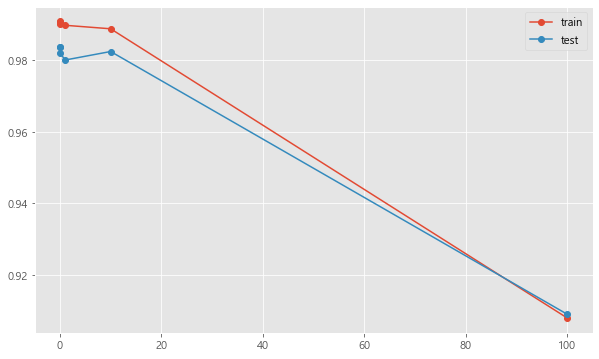

In [45]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.legend()
plt.show()

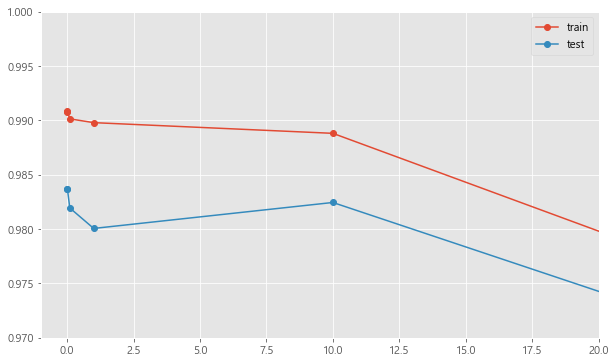

In [46]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
plt.plot(alpha_list, train_score, label='train', marker='o')
plt.plot(alpha_list, test_score, label='test', marker='o')
plt.xlim([-1, 20])
plt.ylim([0.97, 1.0])
plt.legend()
plt.show()

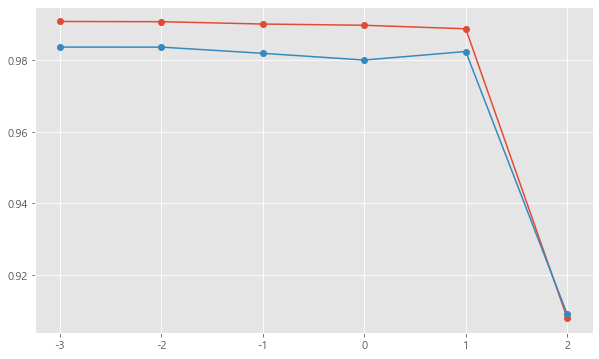

In [47]:
# np.log10() 이용 
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
# 1일때 가장 점수 차이가 적게난다. = 10**(1)

plt.plot(np.log10(alpha_list), train_score, marker='o')
plt.plot(np.log10(alpha_list), test_score, marker='o')
plt.show()

In [48]:
#alpha=10 재적용
model_lasso2 = Lasso(alpha=10)
model_lasso2.fit(X_train_scaled, y_train)

print(model_lasso2.score(X_train_scaled, y_train))
print(model_lasso2.score(X_test_scaled, y_test))

0.9888067471131867
0.9824470598706695


In [49]:
#alpha=1
#0.989789897208096
#0.9800593698421884

In [50]:
model_lasso2.coef_

array([ 0.   ,  0.   ,  0.   , 12.149, 55.449, 42.231,  0.   ,  0.   ,
       13.706,  0.   , 43.219,  5.703, 47.463,  7.423, 11.858,  0.   ,
        0.   , 13.53 , 21.221,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   , 18.67 ,  0.   ,  0.   ,  0.   , 15.81 ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   , 18.147,  0.   ,  0.   ,  0.   ,
        0.   , 15.513,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ])

In [51]:
#alpha=1
model_lasso.coef_

array([  0.   ,   0.   ,   0.   ,   0.   ,   0.503,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,  81.72 , 167.246,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ,
         0.   ,   0.   ,   0.   ,   0.   ,   0.   ,   0.   ])

In [52]:
print(np.sum(model_lasso2.coef_ == 0))

40


In [53]:
print(np.sum(model_lasso.coef_ == 0))

52


# 퀴즈 

- 성별 키와 몸무게(weight-height.csv) 데이타셋을 이용하여 선형, 다항적용, 릿지, 라쏘 모델별로 테스트하고 결과를 확인하여라. 

- Gender 컬럼 전처리

- 스케일링

- 몸무게는 파운드 단위 -> 1파운드 = 0.453592kg
- 키는 인치 단위 -> 1인치 = 2.54cm

In [94]:
#데이터셋 생성
df = pd.read_csv('weight-height.csv')
df['Gender'] = df_target
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [55]:
df.shape

(10000, 3)

In [56]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [57]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### Gender 컬럼 원핫인코딩

In [ ]:
#  원핫인코딩으로 gender 컬럼 변경 
df = pd.get_dummies(df)
df.sample(5)

In [ ]:
# model_ridge = Ridge(alpha=100)
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)
print(model_ridge.score(X_train_scaled, y_train), model_ridge.score(X_test_scaled, y_test))

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for a in alpha_list:
    model_ridge = Ridge(alpha=a)
    model_ridge.fit(X_train_scaled, y_train)
    train_score.append(model_ridge.score(X_train_scaled, y_train))
    test_score.append(model_ridge.score(X_test_scaled, y_test))
                                        
train_score, test_score 

In [ ]:
# np.set_printoptions(precision=3, suppress=True)
plt.plot(np.log10(alpha_list), train_score, label='Train', marker='o')
plt.plot(np.log10(alpha_list), test_score, label='Test', marker='o')
plt.legend()
plt.show()

In [ ]:
# 거리 구하기 
np.array(train_score) - np.array(test_score)

In [ ]:
np.sort(np.array(train_score) - np.array(test_score))

In [ ]:
# model_ridge = Ridge(alpha=100)
model_ridge = Ridge(alpha=0.1)
model_ridge.fit(X_train_scaled, y_train)
print(model_ridge.score(X_train_scaled, y_train), model_ridge.score(X_test_scaled, y_test))

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    model_lasso = Lasso(alpha=a)
    model_lasso.fit(X_train_scaled, y_train)
    train_score.append(model_lasso.score(X_train_scaled, y_train))
    test_score.append(model_lasso.score(X_test_scaled, y_test))
                                        
train_score, test_score   

In [ ]:
# np.set_printoptions(precision=3, suppress=True)
plt.plot(np.log10(alpha_list), train_score, label='Train')
plt.plot(np.log10(alpha_list), test_score, label='Test')
plt.show()

In [ ]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)
print(model_lasso.score(X_train_scaled, y_train), model_lasso.score(X_test_scaled, y_test))

In [ ]:
model_lasso.coef_

In [ ]:
model_lasso.get_params()